In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy.linalg as la

from data import *
from models import *


# Below snippit taken from PyTorch quickstart tutorial
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cpu


In [2]:
#load the saved models
model_rank2 = torch.load("model_rank2.pt")
model_rank1 = torch.load("model_rank1.pt")

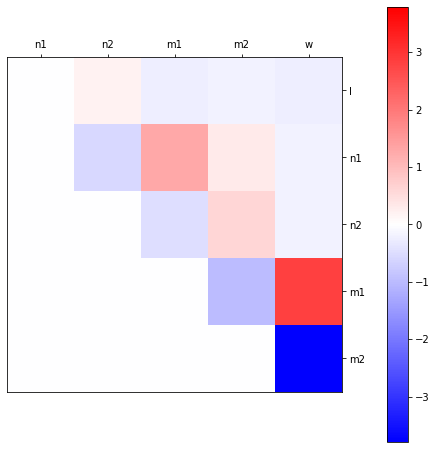

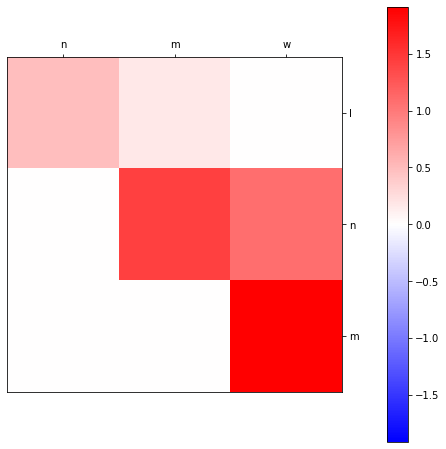

In [9]:
from plotter import visCov, visITO,visUA,visWP
visCov(model_rank2,flip_m_n=True)
visCov(model_rank1,flip_m_n=True)

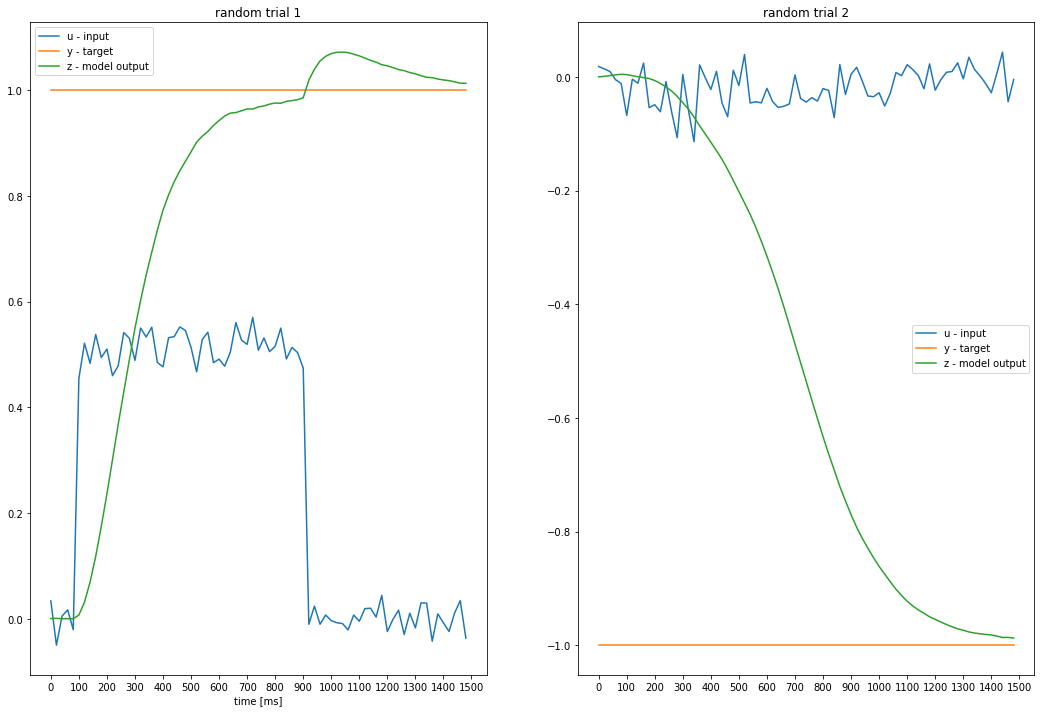

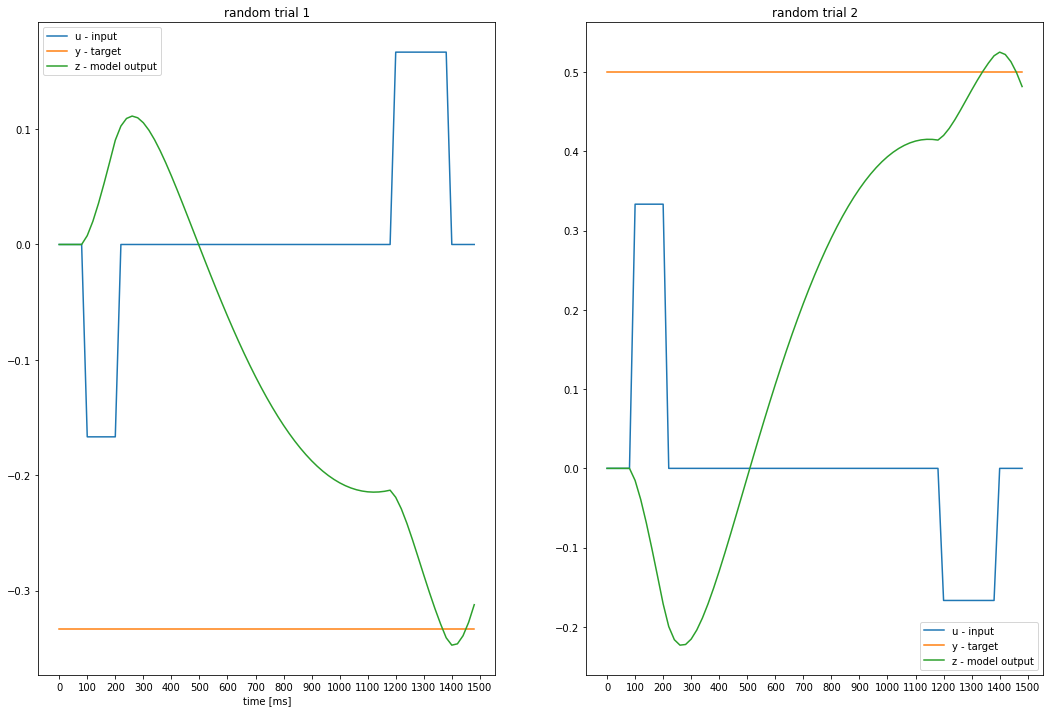

In [4]:
visITO(SingleDecisionDataset, model_rank1)

visITO(ParametricDataset, model_rank2)

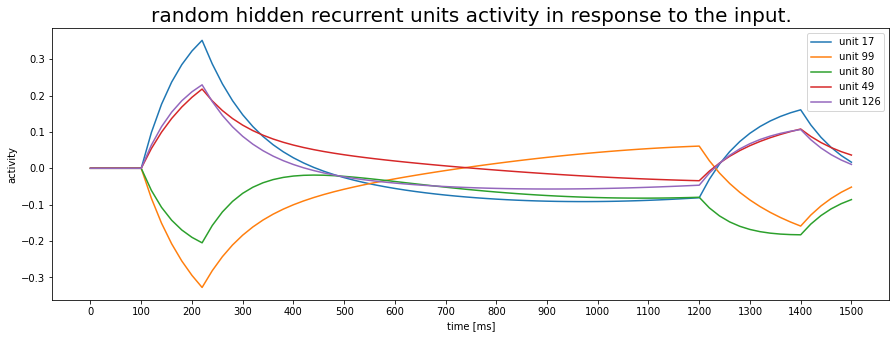

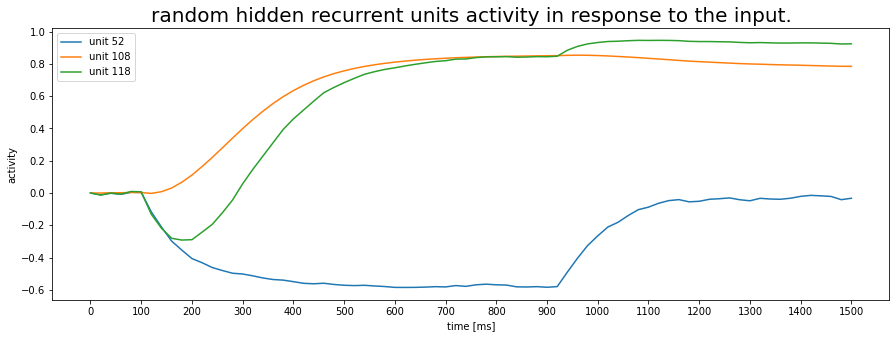

In [5]:
visUA(ParametricDataset, model_rank2)
visUA(SingleDecisionDataset, model_rank1)


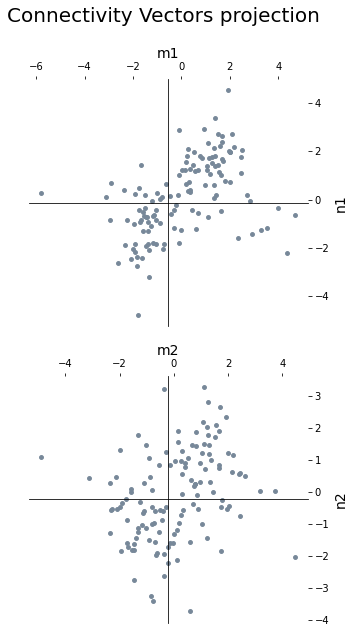

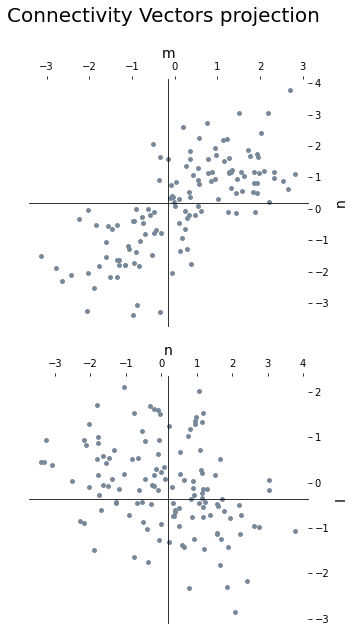

In [6]:
visWP(model_rank2)
visWP(model_rank1)

idx, k, delta, gauss_int
idx, k, delta, gauss_int


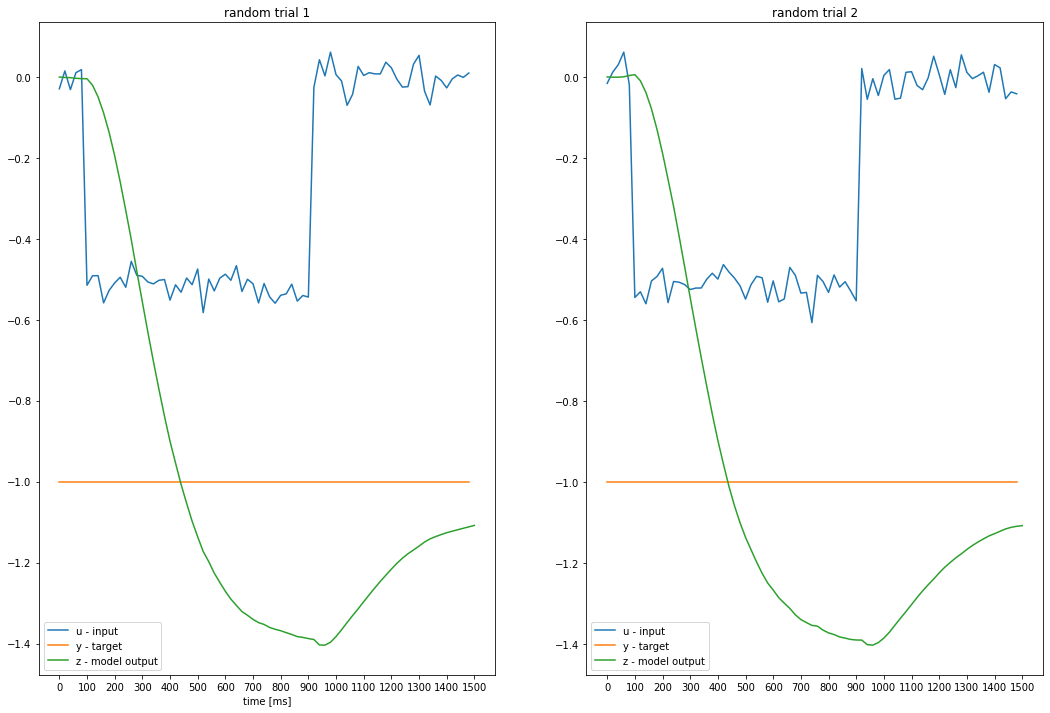

idx, k, delta, gauss_int
idx, k, delta, gauss_int


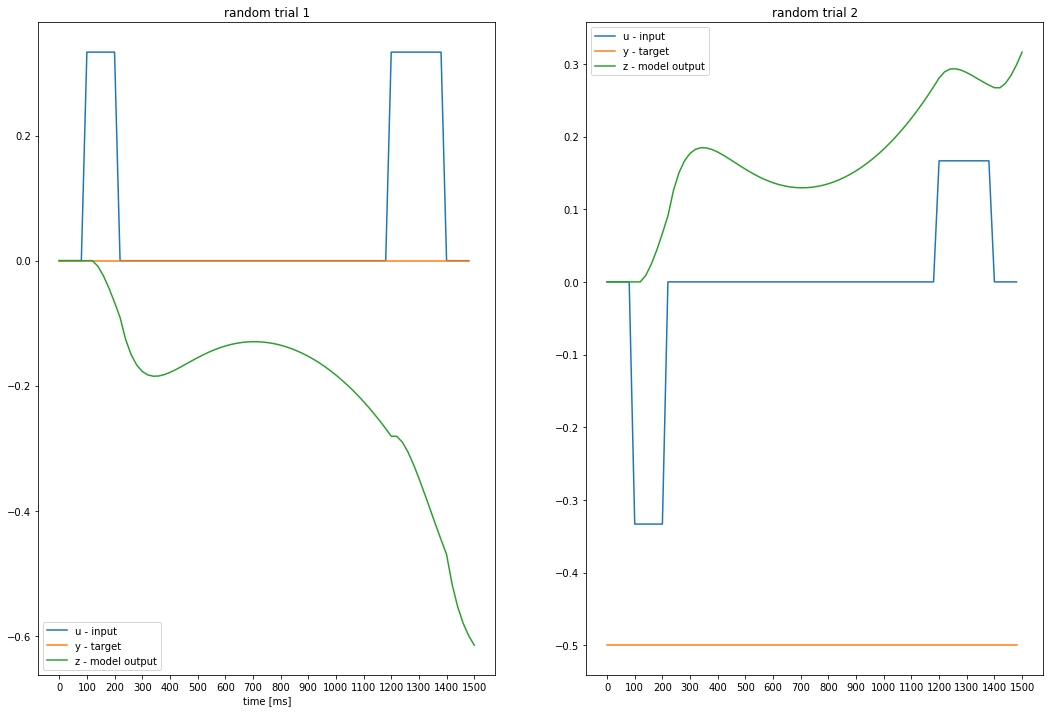

In [7]:
#check the equivalent one, two dimensional models
onedmodel= OneDimEquivalent(model_rank1)
twomodel= TwoDimEquivalent(model_rank2)

d1=SingleDecisionDataset(1)
d2=ParametricDataset(1)

visITO(SingleDecisionDataset, onedmodel)
visITO(ParametricDataset, twomodel)


idx, k, delta, gauss_int
idx, k, delta, gauss_int


/home/erfan/.local/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.458408e-08
  warnings.warn(
/home/erfan/.local/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.092098e-08
  warnings.warn(
/home/erfan/.local/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.096945e-08
  warnings.warn(
/home/erfan/.local/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.057382e-08
  warnings.warn(
/home/erfan/.local/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest difference = 2.138044e-08
  warnings.warn(
/home/erfan/.local/lib/python3.8/site-packages/scipy/integrate/_quadrature.py:372: AccuracyWarning: maxiter (50) exceeded. Latest diffe

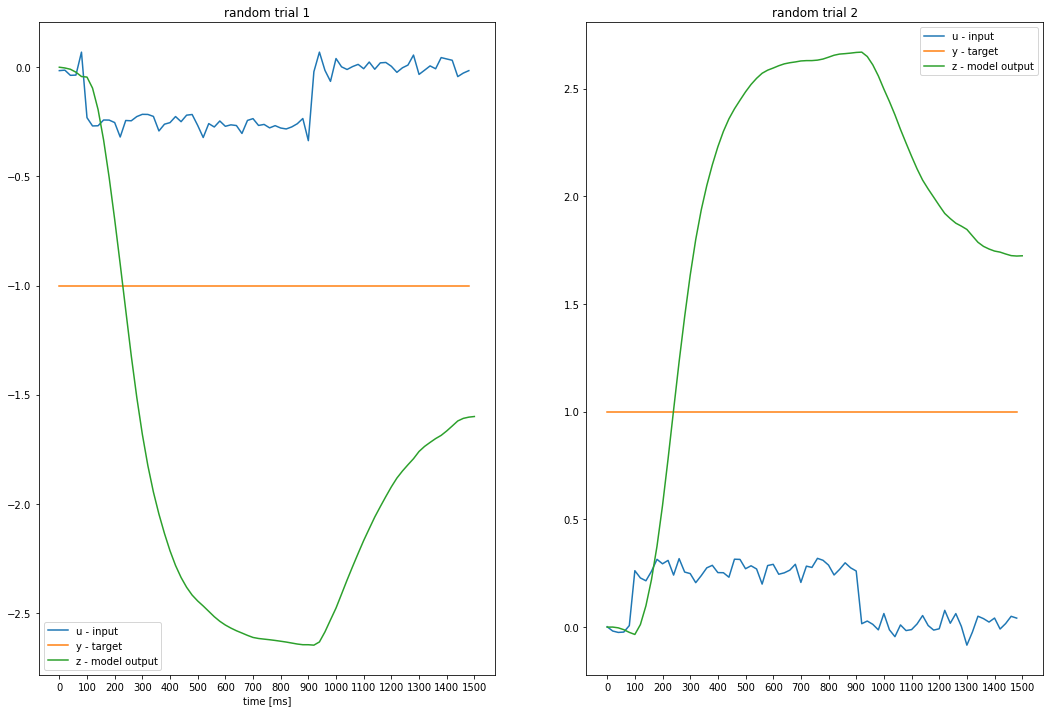

idx, k, delta, gauss_int
idx, k, delta, gauss_int


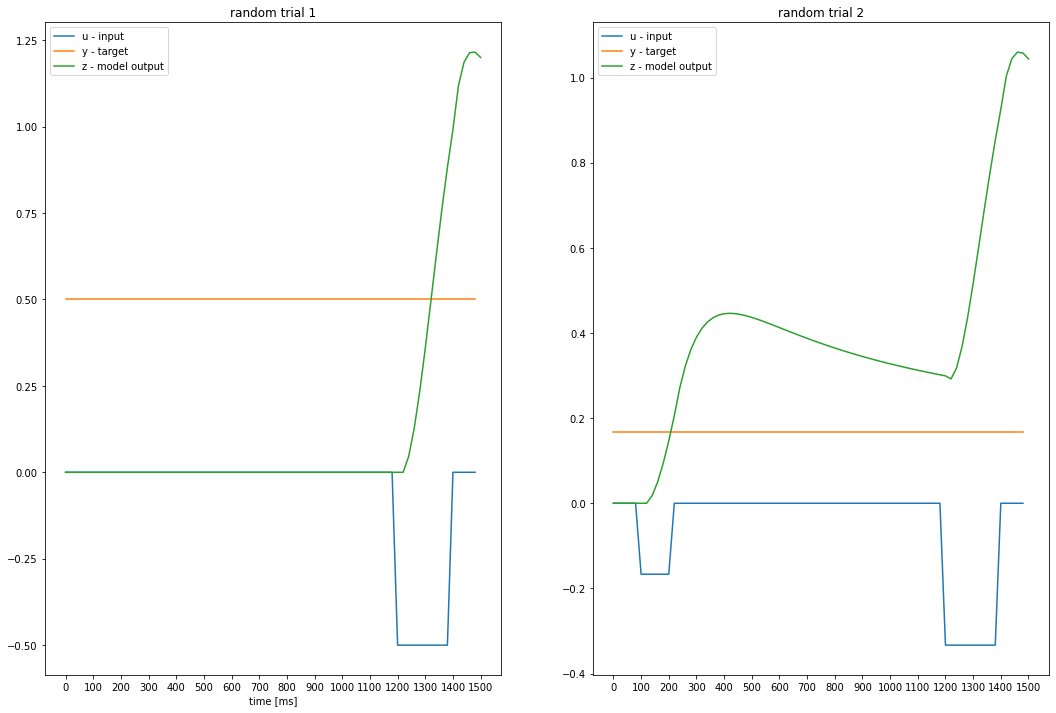

In [8]:
#check the equivalent one, two dimensional models
onedmodel_given= OneDimEquivalent(model_rank1,given_params=True)
twomodel_given= TwoDimEquivalent(model_rank2,given_params=True)

visITO(SingleDecisionDataset, onedmodel_given)
visITO(ParametricDataset, twomodel_given)
